In [1]:
import h2o

import pandas as pd

import numpy as np



In [5]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator



In [2]:
h2o.init()



Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 34 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_laksh_aa32wb
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.715 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [3]:
data = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip")



Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
train, valid, test =data.split_frame([0.8, 0.1], seed = 69)



y = "ArrDelay"
ignoreFields = ["IsArrDelayed", "ArrTime", "TailNum",
                  "ActualElapsedTime"]
xWithDep = [ i for i in train.names if i not in ignoreFields]



In [9]:
m_DLR_def = H2ODeepLearningEstimator(variable_importances = True)
%time m_DLR_def.train(xWithDep, y, train, validation_frame = valid)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Wall time: 1min 4s
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1646200316749_223


Status of Neuron Layers: predicting ArrDelay, regression, gaussian distribution, Quadratic loss, 102,201 weights/biases, 1.2 MB, 377,322 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,308,Input,0.0,,,,,,,,,
1,,2,200,Rectifier,0.0,0.0,0.0,0.089379,0.200177,0.0,-0.001404,0.074233,0.200697,0.181559
2,,3,200,Rectifier,0.0,0.0,0.0,0.324904,0.327334,0.0,-0.033391,0.096048,0.874499,0.074541
3,,4,1,Linear,,0.0,0.0,0.013398,0.020737,0.0,0.007651,0.039426,-0.072261,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 56.65949364192711
RMSE: 7.5272500717012925
MAE: 5.069698531593793
RMSLE: NaN
Mean Residual Deviance: 56.65949364192711

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 59.89527557127475
RMSE: 7.739203807322479
MAE: 5.1455008411305085
RMSLE: NaN
Mean Residual Deviance: 59.89527557127475

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2022-03-02 02:30:45,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-03-02 02:30:54,9.725 sec,4036 obs/sec,0.972968,1,34302.0,10.828817,117.263270,7.953223,0.862885,11.115945,123.564227,8.028866,0.856173
2,,2022-03-02 02:31:06,21.766 sec,5266 obs/sec,2.918905,3,102906.0,8.298712,68.868624,5.692666,0.919472,8.445297,71.323040,5.748384,0.916981
3,,2022-03-02 02:31:16,31.999 sec,5964 obs/sec,4.864842,5,171510.0,9.929146,98.587938,6.964751,0.884722,10.217072,104.388561,7.062909,0.878493
4,,2022-03-02 02:31:30,45.726 sec,6616 obs/sec,7.783747,8,274416.0,7.662065,58.707239,4.443713,0.931354,7.824118,61.216825,4.425493,0.928744
5,,2022-03-02 02:31:43,58.526 sec,7085 obs/sec,10.702652,11,377322.0,7.527250,56.659494,5.069699,0.933748,7.739204,59.895276,5.145501,0.930283



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,AirTime,1.000000,1.000000,0.013063
1,CRSElapsedTime,0.838806,0.838806,0.010957
2,Year,0.788099,0.788099,0.010295
3,DepDelay,0.632594,0.632594,0.008264
4,Cancelled,0.494127,0.494127,0.006455
5,Diverted,0.466293,0.466293,0.006091
6,CancellationCode.missing(NA),0.380930,0.380930,0.004976
7,CancellationCode.NA,0.368556,0.368556,0.004814
8,Origin.HNL,0.363309,0.363309,0.004746
9,Month,0.348973,0.348973,0.004559



See the whole table with table.as_data_frame()


In [11]:
m_DLR_def.model_performance(valid)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 59.89527557127475
RMSE: 7.739203807322479
MAE: 5.1455008411305085
RMSLE: NaN
Mean Residual Deviance: 59.89527557127475


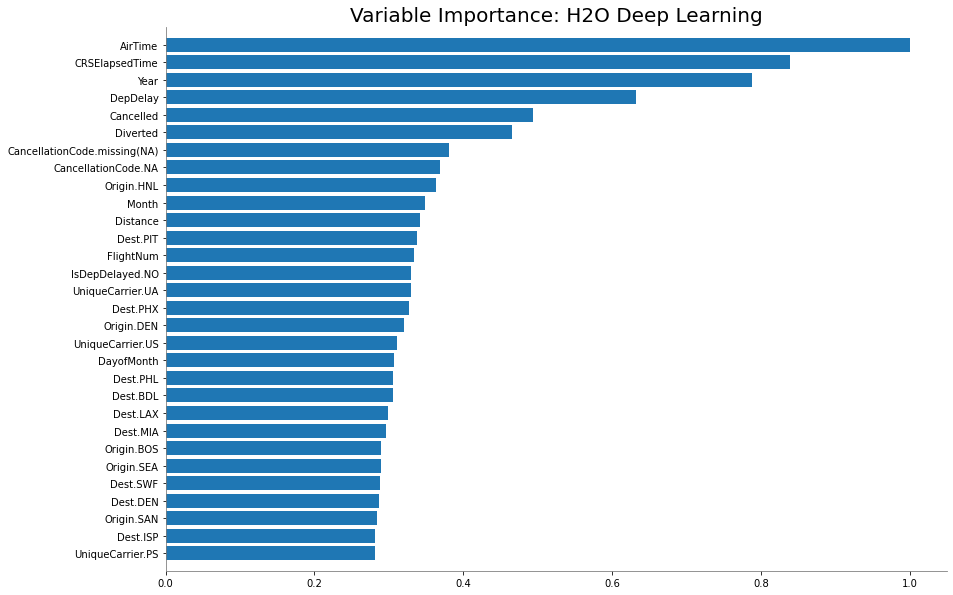

<Figure size 432x288 with 0 Axes>

In [12]:
m_DLR_def.varimp_plot(30)

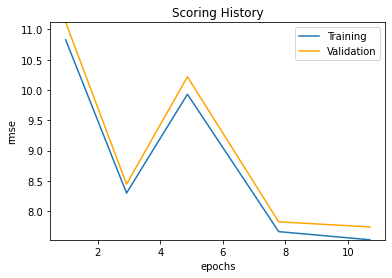

In [13]:
m_DLR_def.plot()

In [15]:
#200 is made 20 to reduce time
m_DLR_200_epochs = H2ODeepLearningEstimator(variable_importances = True,
                                            epochs = 20,
                                           stopping_rounds = 5,
                                           stopping_tolerance =0.0,
                                           stopping_metric = "deviance")
%time m_DLR_200_epochs.train(xWithDep, y, train, validation_frame = valid)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Wall time: 1min 43s
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1646200316749_224


Status of Neuron Layers: predicting ArrDelay, regression, gaussian distribution, Quadratic loss, 102,201 weights/biases, 1.2 MB, 720,342 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,308,Input,0.0,,,,,,,,,
1,,2,200,Rectifier,0.0,0.0,0.0,0.091777,0.203354,0.0,-0.001379,0.081575,0.202121,0.224301
2,,3,200,Rectifier,0.0,0.0,0.0,0.20639,0.225688,0.0,-0.032953,0.101155,0.859548,0.09713
3,,4,1,Linear,,0.0,0.0,0.005019,0.008841,0.0,0.008784,0.047773,-0.03039,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 50.61955632984205
RMSE: 7.1147421829495725
MAE: 4.073032388823096
RMSLE: NaN
Mean Residual Deviance: 50.61955632984205

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 51.0272669004692
RMSE: 7.143337238326999
MAE: 4.148778451915668
RMSLE: NaN
Mean Residual Deviance: 51.0272669004692

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2022-03-02 02:36:35,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-03-02 02:36:43,9.742 sec,3986 obs/sec,0.972968,1,34302.0,14.736319,217.159090,11.516161,0.738141,14.912441,222.380898,11.674196,0.741151
2,,2022-03-02 02:36:55,21.801 sec,5277 obs/sec,2.918905,3,102906.0,9.420714,88.749861,7.072486,0.892982,9.282325,86.161550,7.024589,0.899709
3,,2022-03-02 02:37:10,36.336 sec,6236 obs/sec,5.837810,6,205812.0,8.785541,77.185724,5.910606,0.906926,8.661068,75.014094,5.909038,0.912685
4,,2022-03-02 02:37:23,49.644 sec,6821 obs/sec,8.756715,9,308718.0,7.698729,59.270432,4.771339,0.928529,7.570309,57.309572,4.836484,0.933292
5,,2022-03-02 02:37:36,1 min 2.311 sec,7232 obs/sec,11.675620,12,411624.0,8.677031,75.290870,6.030384,0.909211,8.722274,76.078056,6.079664,0.911446
6,,2022-03-02 02:37:48,1 min 14.363 sec,7571 obs/sec,14.594526,15,514530.0,7.861013,61.795521,4.832356,0.925484,7.988791,63.820787,4.951834,0.925713
7,,2022-03-02 02:38:00,1 min 26.384 sec,7819 obs/sec,17.513431,18,617436.0,7.114742,50.619556,4.073032,0.938961,7.143337,51.027267,4.148778,0.940605
8,,2022-03-02 02:38:12,1 min 38.079 sec,8036 obs/sec,20.432336,21,720342.0,7.436792,55.305882,4.645887,0.933310,7.526851,56.653481,4.792856,0.934056
9,,2022-03-02 02:38:13,1 min 39.086 sec,8036 obs/sec,20.432336,21,720342.0,7.114742,50.619556,4.073032,0.938961,7.143337,51.027267,4.148778,0.940605



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,AirTime,1.000000,1.000000,0.013926
1,CRSElapsedTime,0.916024,0.916024,0.012756
2,Year,0.769543,0.769543,0.010717
3,DepDelay,0.585834,0.585834,0.008158
4,Cancelled,0.534693,0.534693,0.007446
5,Diverted,0.439825,0.439825,0.006125
6,Distance,0.404803,0.404803,0.005637
7,Month,0.396755,0.396755,0.005525
8,IsDepDelayed.NO,0.396356,0.396356,0.005520
9,FlightNum,0.361108,0.361108,0.005029



See the whole table with table.as_data_frame()


In [16]:
m_DLR_200_epochs.model_performance(valid)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 51.0272669004692
RMSE: 7.143337238326999
MAE: 4.148778451915668
RMSLE: NaN
Mean Residual Deviance: 51.0272669004692


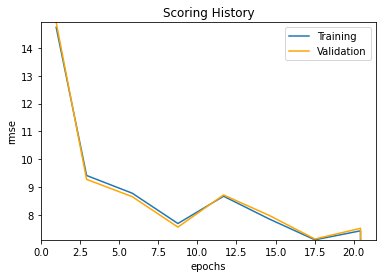

In [17]:
m_DLR_200_epochs.plot()

In [18]:
m_DLR_200_epochs.scoring_history()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2022-03-02 02:36:35,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-03-02 02:36:43,9.742 sec,3986 obs/sec,0.972968,1,34302.0,14.736319,217.159090,11.516161,0.738141,14.912441,222.380898,11.674196,0.741151
2,,2022-03-02 02:36:55,21.801 sec,5277 obs/sec,2.918905,3,102906.0,9.420714,88.749861,7.072486,0.892982,9.282325,86.161550,7.024589,0.899709
3,,2022-03-02 02:37:10,36.336 sec,6236 obs/sec,5.837810,6,205812.0,8.785541,77.185724,5.910606,0.906926,8.661068,75.014094,5.909038,0.912685
4,,2022-03-02 02:37:23,49.644 sec,6821 obs/sec,8.756715,9,308718.0,7.698729,59.270432,4.771339,0.928529,7.570309,57.309572,4.836484,0.933292
5,,2022-03-02 02:37:36,1 min 2.311 sec,7232 obs/sec,11.675620,12,411624.0,8.677031,75.290870,6.030384,0.909211,8.722274,76.078056,6.079664,0.911446
6,,2022-03-02 02:37:48,1 min 14.363 sec,7571 obs/sec,14.594526,15,514530.0,7.861013,61.795521,4.832356,0.925484,7.988791,63.820787,4.951834,0.925713
7,,2022-03-02 02:38:00,1 min 26.384 sec,7819 obs/sec,17.513431,18,617436.0,7.114742,50.619556,4.073032,0.938961,7.143337,51.027267,4.148778,0.940605
8,,2022-03-02 02:38:12,1 min 38.079 sec,8036 obs/sec,20.432336,21,720342.0,7.436792,55.305882,4.645887,0.933310,7.526851,56.653481,4.792856,0.934056
9,,2022-03-02 02:38:13,1 min 39.086 sec,8036 obs/sec,20.432336,21,720342.0,7.114742,50.619556,4.073032,0.938961,7.143337,51.027267,4.148778,0.940605


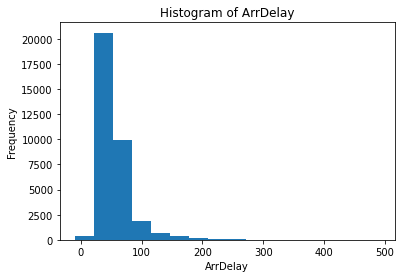

breaks,counts,mids_true,mids,widths
-24.7647,nan,nan,nan,nan
6.47059,425,-28,-9.14706,31.2353
37.7059,20618,-12,22.0882,31.2353
68.9412,9959,3.5,53.3235,31.2353
100.176,1901,19,84.5588,31.2353
131.412,708,34.5,115.794,31.2353
162.647,334,50.5,147.029,31.2353
193.882,148,66,178.265,31.2353
225.118,94,81.5,209.5,31.2353
256.353,43,97,240.735,31.2353


In [19]:
train[y].hist()

In [ ]:
#if it looks like 2 exponential decays, try laplace

In [20]:
#200 is made 20 to reduce time
m_DLR_laplace = H2ODeepLearningEstimator(variable_importances = True,
                                            epochs = 20,
                                           distribution = "laplace")
%time m_DLR_laplace.train(xWithDep, y, train, validation_frame = valid)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Wall time: 1min 14s
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1646200316749_225


Status of Neuron Layers: predicting ArrDelay, regression, laplace distribution, Absolute loss, 102,201 weights/biases, 1.2 MB, 720,342 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,308,Input,0.0,,,,,,,,,
1,,2,200,Rectifier,0.0,0.0,0.0,0.134708,0.27096,0.0,-0.00248,0.097771,-0.115443,0.297405
2,,3,200,Rectifier,0.0,0.0,0.0,0.322459,0.248603,0.0,-0.039479,0.096089,0.617579,0.167628
3,,4,1,Linear,,0.0,0.0,0.003523,0.001766,0.0,-0.000641,0.025843,-0.401925,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 53.706867523635935
RMSE: 7.328496948463302
MAE: 3.8397425244306826
RMSLE: NaN
Mean Residual Deviance: 3.8397425244306826

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 53.75150127691146
RMSE: 7.3315415348282285
MAE: 3.8673988945194684
RMSLE: NaN
Mean Residual Deviance: 3.8673988945194684

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2022-03-02 02:42:17,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-03-02 02:42:23,7.502 sec,5520 obs/sec,0.972968,1,34302.0,12.232811,8.898997,8.898997,0.843932,12.221179,8.821616,8.821616,0.826150
2,,2022-03-02 02:42:37,21.397 sec,9004 obs/sec,4.864842,5,171510.0,8.916054,6.121892,6.121892,0.917090,9.014619,6.203656,6.203656,0.905410
3,,2022-03-02 02:42:50,33.728 sec,10178 obs/sec,8.756715,9,308718.0,7.328497,3.839743,3.839743,0.943987,7.331542,3.867399,3.867399,0.937434
4,,2022-03-02 02:43:02,45.666 sec,10845 obs/sec,12.648589,13,445926.0,7.868552,4.121556,4.121556,0.935427,7.816388,4.123326,4.123326,0.928885
5,,2022-03-02 02:43:16,59.520 sec,11442 obs/sec,17.513431,18,617436.0,7.303970,4.378620,4.378620,0.944361,7.437831,4.440265,4.440265,0.935607
6,,2022-03-02 02:43:24,1 min 8.055 sec,11717 obs/sec,20.432336,21,720342.0,7.056924,3.868100,3.868100,0.948061,7.203516,3.967192,3.967192,0.939600
7,,2022-03-02 02:43:25,1 min 9.075 sec,11717 obs/sec,20.432336,21,720342.0,7.328497,3.839743,3.839743,0.943987,7.331542,3.867399,3.867399,0.937434



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,AirTime,1.000000,1.000000,0.024808
1,CRSElapsedTime,0.911141,0.911141,0.022604
2,DepDelay,0.602675,0.602675,0.014951
3,Year,0.567371,0.567371,0.014075
4,Cancelled,0.388783,0.388783,0.009645
5,Diverted,0.334045,0.334045,0.008287
6,Distance,0.312058,0.312058,0.007742
7,CancellationCode.NA,0.241150,0.241150,0.005983
8,IsDepDelayed.NO,0.223760,0.223760,0.005551
9,FlightNum,0.217062,0.217062,0.005385



See the whole table with table.as_data_frame()


In [21]:
m_DLR_laplace.model_performance(valid)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 53.75150127691146
RMSE: 7.3315415348282285
MAE: 3.8673988945194684
RMSLE: NaN
Mean Residual Deviance: 3.8673988945194684


In [22]:
all_models = [m_DLR_def, m_DLR_200_epochs, m_DLR_laplace]

In [23]:
mae = map(lambda x:x.mae(), all_models)

In [24]:
print("   defaults: %.4f\n   200 epochs: %.4f\n   laplace: %.4f\n" % tuple(list(mae)))

   defaults: 5.0697
   200 epochs: 4.0730
   laplace: 3.8397



In [25]:
rmse = map(lambda x:x.rmse(), all_models)

In [26]:
print("   defaults: %.4f\n   200 epochs: %.4f\n   laplace: %.4f\n" % tuple(list(rmse)))

   defaults: 7.5273
   200 epochs: 7.1147
   laplace: 7.3285

